<a href="https://colab.research.google.com/github/rosaarad/Deep-Learning-Projects/blob/main/food_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, three models have been trained and evaluated on Dataset "Food-11" based on [this paper](https://www.sciencedirect.com/science/article/abs/pii/S294982442300085X)

The models are:
1. A CNN model made from scratch
2. Transfer learning with InceptionV3
3. Transfer learning with EfficientNetV2

They were evaluated with and without data augmentation.


# Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Rescaling, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy as loss
from tensorflow.keras import callbacks

print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Loadig the dataset

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download trolukovich/food11-image-dataset

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
License(s): CC0-1.0
food11-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip food11-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/245.jpg   

# Preprocessing the data

In [ ]:
classes = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

In [ ]:
train_images =[]
valid_images = []
evalu_images = []

def create_dataset(dir,arr):

  for newClass in classes:
    path = os.path.join(dir, newClass)
    class_num = classes.index(newClass)

    for img in os.listdir(path):
      img = cv2.imread(os.path.join(path,img))
      rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      rgb_img_resized = cv2.resize(rgb_img, (244,244))
      arr.append([rgb_img_resized , class_num])



create_dataset("/content/training", train_images)
create_dataset("/content/validation", valid_images)
create_dataset("/content/evaluation", evalu_images)

In [ ]:
import random

random.shuffle(train_images)
random.shuffle(valid_images)
random.shuffle(evalu_images)

In [ ]:
train_x = []
train_y = []

for features, labels in train_images:
  train_x.append(features)
  train_y.append(labels)

train_x = np.array(train_x).reshape(-1, 244, 244, 3)
train_y = np.array(train_y)

#--------------------------------------------------

valid_x = []
valid_y = []

for features, labels in valid_images:
  valid_x.append(features)
  valid_y.append(labels)

valid_x = np.array(valid_x).reshape(-1, 244, 244, 3)
valid_y = np.array(valid_y)

#--------------------------------------------------

evalu_x = []
evalu_y = []

for features, labels in evalu_images:
  evalu_x.append(features)
  evalu_y.append(labels)

evalu_x = np.array(evalu_x).reshape(-1, 244, 244, 3)
evalu_y = np.array(evalu_y)

In [ ]:
print(train_x.shape)
print(train_y.shape)

print(valid_x.shape)
print(valid_y.shape)

print(evalu_x.shape)
print(evalu_y.shape)

(9866, 244, 244, 3)
(9866,)
(3430, 244, 244, 3)
(3430,)
(3347, 244, 244, 3)
(3347,)


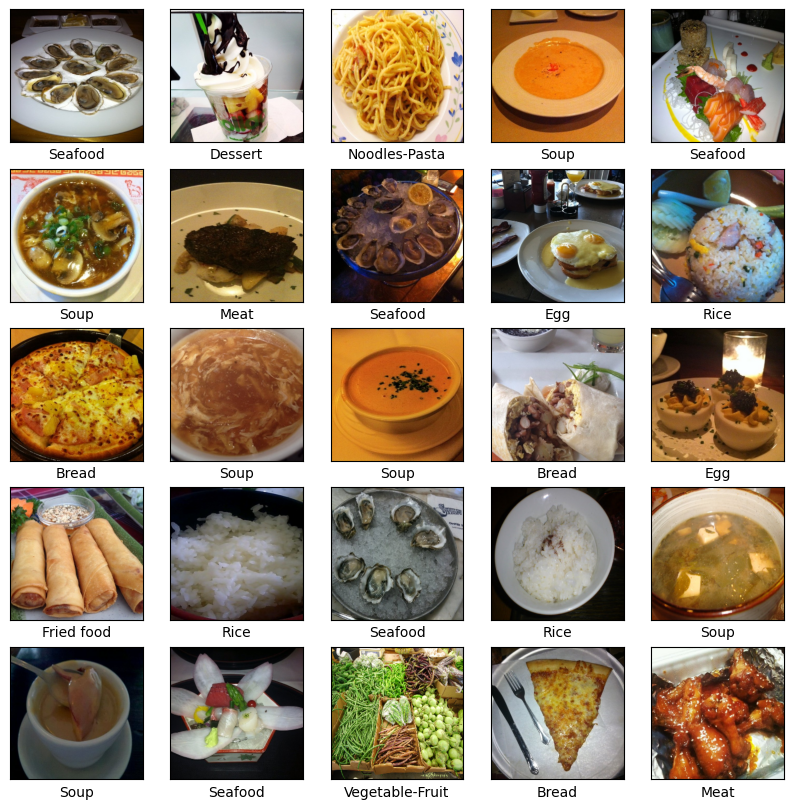

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_y[i]])
plt.show()

# Saving the data

In [ ]:
pickle_out = open("train_x.pickle", "wb")
pickle.dump(train_x[:4500], pickle_out)
pickle_out.close()

pickle_out = open("train_y.pickle", "wb")
pickle.dump(train_y[:4500], pickle_out)
pickle_out.close()

pickle_out = open("valid_x.pickle", "wb")
pickle.dump(valid_x[:1500], pickle_out)
pickle_out.close()

pickle_out = open("valid_y.pickle", "wb")
pickle.dump(valid_y[:1500], pickle_out)
pickle_out.close()

pickle_out = open("evalu_x.pickle", "wb")
pickle.dump(evalu_x[:1000], pickle_out)
pickle_out.close()

pickle_out = open("evalu_y.pickle", "wb")
pickle.dump(evalu_y[:1000], pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("train_x.pickle", "rb")
train_x = pickle.load(pickle_in)

pickle_in = open("train_y.pickle", "rb")
train_y = pickle.load(pickle_in)

pickle_in = open("valid_x.pickle", "rb")
valid_x = pickle.load(pickle_in)

pickle_in = open("valid_y.pickle", "rb")
valid_y = pickle.load(pickle_in)

pickle_in = open("evalu_x.pickle", "rb")
evalu_x = pickle.load(pickle_in)

pickle_in = open("evalu_y.pickle", "rb")
evalu_y = pickle.load(pickle_in)

In [ ]:
%rm -rf training
%rm -rf evaluation
%rm -rf validation

# **Models without data augmentation**

In [ ]:
measurements = {}

In [ ]:
# setting the callbacks

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 9e-1:
            self.model.stop_training = True

EScallback1 = callbacks.EarlyStopping(monitor='accuracy', patience=5)
EScallback2 = CustomCallback()

## CNN from scratch (without data augmentation)

In [ ]:
scratch_model = Sequential([

  Rescaling(1./255, input_shape=(train_x.shape[1], train_x.shape[2], 3)),

  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dropout(0.3),
  Dense(11, activation='softmax'),

])

In [ ]:
scratch_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 244, 244, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)       

In [ ]:
scratch_model.compile(optimizer='adam',
              loss=loss(),
              metrics=['accuracy'], run_eagerly=True)

In [ ]:
scratch_history = scratch_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100


71/71 [==============================] - 25s 242ms/step - loss: 2.2894 - accuracy: 0.1680 - val_loss: 2.2123 - val_accuracy: 0.2187
Epoch 2/100
71/71 [==============================] - 14s 198ms/step - loss: 2.1680 - accuracy: 0.2320 - val_loss: 2.1541 - val_accuracy: 0.2247
Epoch 3/100
71/71 [==============================] - 14s 197ms/step - loss: 2.0949 - accuracy: 0.2564 - val_loss: 2.0072 - val_accuracy: 0.2840
Epoch 4/100
71/71 [==============================] - 14s 198ms/step - loss: 1.9579 - accuracy: 0.3233 - val_loss: 1.9194 - val_accuracy: 0.3273
Epoch 5/100
71/71 [==============================] - 14s 198ms/step - loss: 1.8660 - accuracy: 0.3471 - val_loss: 1.8735 - val_accuracy: 0.3460
Epoch 6/100
71/71 [==============================] - 14s 194ms/step - loss: 1.8214 - accuracy: 0.3698 - val_loss: 1.8404 - val_accuracy: 0.3640
Epoch 7/100
71/71 [==============================] - 14s 197ms/step - loss: 1.7364 - accuracy: 0.3909 - val_loss: 1.8524 - val_accuracy: 0.3673
Epoc

In [ ]:
y_pred = scratch_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements['scratched_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 2s 34ms/step
              precision    recall  f1-score   support

           0       0.30      0.31      0.30       101
           1       0.32      0.23      0.27        48
           2       0.37      0.35      0.36       159
           3       0.37      0.20      0.26        97
           4       0.55      0.24      0.34        95
           5       0.57      0.71      0.63       132
           6       0.30      0.69      0.42        39
           7       0.12      0.11      0.11        27
           8       0.38      0.47      0.42        86
           9       0.71      0.63      0.66       150
          10       0.54      0.80      0.65        66

    accuracy                           0.45      1000
   macro avg       0.41      0.43      0.40      1000
weighted avg       0.46      0.45      0.44      1000


Evaluation accuracy: 0.451

Evaluation precision: 0.411240091470699

Evaluation recall: 0.43060303942927725

Evaluation f1Score: 0.4

## InceptionV3 (without data augmentation)

In [ ]:
from keras.applications import InceptionV3

In [ ]:
IV3_model = Sequential()

pretrained_model= InceptionV3(include_top=False, input_shape=(244, 244, 3))

for layer in pretrained_model.layers:
        layer.trainable=False

IV3_model.add(pretrained_model)

IV3_model.add(Conv2D(64, (3,3), activation='relu'))
IV3_model.add(Conv2D(64, (3,3), activation='relu'))
IV3_model.add(BatchNormalization())

IV3_model.add(Flatten())

IV3_model.add(Dense(512, activation='relu'))
IV3_model.add(Dropout(0.5))
IV3_model.add(Dense(11, activation='softmax'))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for (i,layer) in enumerate(IV3_model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 Functional True
1 Conv2D True
2 Conv2D True
3 BatchNormalization True
4 Flatten True
5 Dense True
6 Dropout True
7 Dense True


In [ ]:
IV3_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 conv2d_100 (Conv2D)         (None, 4, 4, 64)          1179712   
                                                                 
 conv2d_101 (Conv2D)         (None, 2, 2, 64)          36928     
                                                                 
 batch_normalization_94 (Ba  (None, 2, 2, 64)          256       
 tchNormalization)                                               
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                      

In [ ]:
IV3_model.compile(optimizer='adam',
              loss=loss(),
              metrics=['accuracy'], run_eagerly=True)

In [ ]:
IV3_history = IV3_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
71/71 [==============================] - 63s 738ms/step - loss: 2.2179 - accuracy: 0.2344 - val_loss: 3.0372 - val_accuracy: 0.1813
Epoch 2/100
71/71 [==============================] - 44s 616ms/step - loss: 1.9675 - accuracy: 0.3147 - val_loss: 2.5999 - val_accuracy: 0.2267
Epoch 3/100
71/71 [==============================] - 45s 636ms/step - loss: 1.8490 - accuracy: 0.3551 - val_loss: 2.5669 - val_accuracy: 0.2807
Epoch 4/100
71/71 [==============================] - 43s 611ms/step - loss: 1.7428 - accuracy: 0.3967 - val_loss: 1.9826 - val_accuracy: 0.3373
Epoch 5/100
71/71 [==============================] - 44s 622ms/step - loss: 1.6611 - accuracy: 0.4264 - val_loss: 2.2078 - val_accuracy: 0.2940
Epoch 6/100
71/71 [==============================] - 44s 626ms/step - loss: 1.6248 - accuracy: 0.4378 - val_loss: 2.8709 - val_accuracy: 0.3040
Epoch 7/100
71/71 [==============================] - 44s 623ms/step - loss: 1.5215 - accuracy: 0.4684 - val_loss: 2.2202 - val_accuracy:

In [ ]:
y_pred = IV3_model.predict(evalu_x, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements['IV3_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

              precision    recall  f1-score   support

           0       0.27      0.17      0.21       101
           1       0.38      0.25      0.30        48
           2       0.26      0.26      0.26       159
           3       0.30      0.21      0.25        97
           4       0.25      0.16      0.19        95
           5       0.46      0.48      0.47       132
           6       0.49      0.46      0.47        39
           7       0.35      0.48      0.41        27
           8       0.48      0.23      0.31        86
           9       0.43      0.71      0.53       150
          10       0.37      0.64      0.46        66

    accuracy                           0.37      1000
   macro avg       0.37      0.37      0.35      1000
weighted avg       0.36      0.37      0.35      1000


Evaluation accuracy: 0.368

Evaluation precision: 0.36518448982584495

Evaluation recall: 0.3675278682072939

Evaluation f1Score: 0.35104319131103406


## EfficientNetV2 (without data augmentation)

In [ ]:
from keras.applications import EfficientNetB0

In [ ]:
eNet_model = Sequential()

pretrained_model= EfficientNetB0(include_top=False, input_shape=(244, 244, 3))

for layer in pretrained_model.layers:
        layer.trainable=False

eNet_model.add(pretrained_model)
eNet_model.add(Flatten())
eNet_model.add(Dense(512, activation='relu'))
eNet_model.add(Dropout(0.5))
eNet_model.add(Dense(11, activation='softmax'))

In [ ]:
eNet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 81920)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               41943552  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 11)                5643      
                                                                 
Total params: 45998766 (175.47 MB)
Trainable params: 41949195 (160.02 MB)
Non-trainable params: 4049571 (15.45 MB)
_____

In [ ]:
eNet64_model = eNet_model
eNet64_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet64_history = eNet64_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
71/71 [==============================] - 27s 272ms/step - loss: 2.4040 - accuracy: 0.6529 - val_loss: 0.8199 - val_accuracy: 0.7913
Epoch 2/100
71/71 [==============================] - 13s 186ms/step - loss: 0.5229 - accuracy: 0.8467 - val_loss: 0.7408 - val_accuracy: 0.8153
Epoch 3/100
71/71 [==============================] - 15s 217ms/step - loss: 0.3621 - accuracy: 0.8927 - val_loss: 0.6688 - val_accuracy: 0.8367
Epoch 4/100
71/71 [==============================] - 15s 216ms/step - loss: 0.2783 - accuracy: 0.9142 - val_loss: 0.7151 - val_accuracy: 0.8407


In [ ]:
y_pred = eNet64_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements['eNet64_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 4s 66ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       101
           1       0.90      0.77      0.83        48
           2       0.87      0.79      0.83       159
           3       0.80      0.79      0.80        97
           4       0.82      0.76      0.79        95
           5       0.79      0.94      0.86       132
           6       1.00      1.00      1.00        39
           7       0.93      0.96      0.95        27
           8       0.89      0.91      0.90        86
           9       0.95      0.99      0.97       150
          10       0.98      0.88      0.93        66

    accuracy                           0.87      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.87      0.87      0.87      1000


Evaluation accuracy: 0.873

Evaluation precision: 0.8888601225621745

Evaluation recall: 0.8782791503694704

Evaluation f1Score: 0.8

In [ ]:
eNet128_model = eNet_model
eNet128_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet128_history = eNet128_model.fit(train_x, train_y, batch_size=128, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
36/36 [==============================] - 21s 406ms/step - loss: 0.3625 - accuracy: 0.9158 - val_loss: 1.0607 - val_accuracy: 0.8140


In [ ]:
y_pred = eNet128_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements['eNet128_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 4s 67ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.96      0.50      0.66        48
           2       0.82      0.75      0.79       159
           3       0.72      0.79      0.75        97
           4       0.81      0.73      0.77        95
           5       0.82      0.93      0.87       132
           6       0.95      1.00      0.97        39
           7       0.92      0.89      0.91        27
           8       0.93      0.91      0.92        86
           9       0.93      0.99      0.96       150
          10       0.93      0.95      0.94        66

    accuracy                           0.85      1000
   macro avg       0.87      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000


Evaluation accuracy: 0.853

Evaluation precision: 0.872800381273525

Evaluation recall: 0.8468209334921418

Evaluation f1Score: 0.85

In [ ]:
eNet256_model = eNet_model
eNet256_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet256_history = eNet256_model.fit(train_x, train_y, batch_size=256, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
18/18 [==============================] - 21s 819ms/step - loss: 0.3526 - accuracy: 0.9240 - val_loss: 1.1737 - val_accuracy: 0.8427


In [ ]:
y_pred = eNet256_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements['eNet256_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 3s 65ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       101
           1       0.79      0.62      0.70        48
           2       0.80      0.81      0.80       159
           3       0.82      0.82      0.82        97
           4       0.83      0.81      0.82        95
           5       0.92      0.86      0.89       132
           6       1.00      0.97      0.99        39
           7       0.87      0.96      0.91        27
           8       0.90      0.92      0.91        86
           9       0.93      0.99      0.95       150
          10       0.97      0.94      0.95        66

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000


Evaluation accuracy: 0.868

Evaluation precision: 0.8743833983153791

Evaluation recall: 0.8691929352425894

Evaluation f1Score: 0.8

## Results

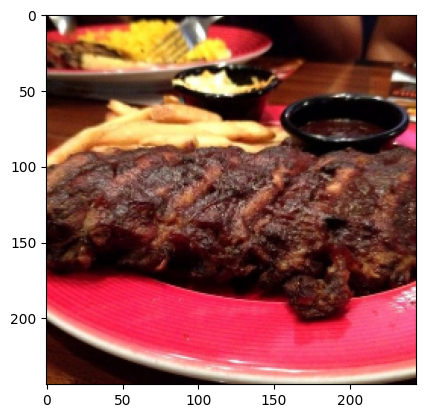

1/1 [==============================] - 0s 355ms/step
Our model says it is Meat
1/1 [==============================] - 1s 1s/step
IV3 model says it is Dessert
1/1 [==============================] - 1s 1s/step
eNet64 model says it is Meat
1/1 [==============================] - 0s 41ms/step
eNet128 model says it is Meat
1/1 [==============================] - 0s 44ms/step
eNet256 model says it is Meat


In [ ]:
sample = valid_x[30]

plt.imshow(sample)
plt.show()

predS = scratch_model.predict(sample.reshape(-1, 244, 244, 3))
predS = np.argmax(predS)
print("Our model says it is", classes[predS])

predIV3 = IV3_model.predict(sample.reshape(-1, 244, 244, 3))
predIV3 = np.argmax(predIV3)
print("IV3 model says it is", classes[predIV3])

predENet64 = eNet64_model.predict(sample.reshape(-1, 244, 244, 3))
predENet64 = np.argmax(predENet64)
print("eNet64 model says it is", classes[predENet64])

predENet128 = eNet128_model.predict(sample.reshape(-1, 244, 244, 3))
predENet128 = np.argmax(predENet128)
print("eNet128 model says it is", classes[predENet128])

predENet256 = eNet256_model.predict(sample.reshape(-1, 244, 244, 3))
predENet256 = np.argmax(predENet256)
print("eNet256 model says it is", classes[predENet256])


In [ ]:
measure_table = pd.DataFrame.from_dict(measurements).T
measure_table .rename(columns = {0:'Accuracy', 1:'Precision', 2:'Recall', 3:'F1-Score'}, inplace = True)

# saving the table
pickle_out = open("measurements.pickle", "wb")
pickle.dump(measure_table, pickle_out)
pickle_out.close()

measure_table

,Accuracy,Precision,Recall,F1-Score
scratched_model,0.451,0.411240,0.430603,0.401458
IV3_model,0.368,0.365184,0.367528,0.351043
eNet64_model,0.873,0.888860,0.878279,0.881927
eNet128_model,0.853,0.872800,0.846821,0.852087
eNet256_model,0.868,0.874383,0.869193,0.870390


# **Models with data augmentation**

In [ ]:
measurements2 = {}

In [ ]:
# setting the callbacks

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 9e-1:
            self.model.stop_training = True

EScallback1 = callbacks.EarlyStopping(monitor='accuracy', patience=5)
EScallback2 = CustomCallback()

In [ ]:
# data augmentation

from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomZoom, RandomFlip

data_augmentation = Sequential([
    RandomTranslation(height_factor=(0, 0.2), width_factor=(0, 0.2)),
    RandomFlip("horizontal"),
    RandomRotation(factor=(0, 0.4)),
    RandomZoom(height_factor=(0, 0.2), width_factor=(0, 0.2))
])

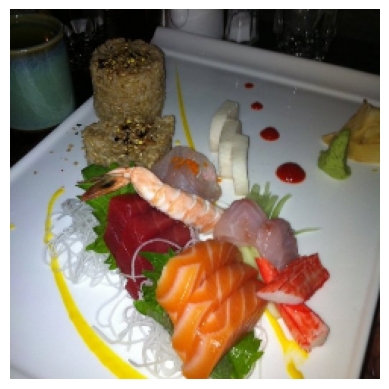

In [ ]:
plt.axis('off')
plt.imshow(train_x[4])

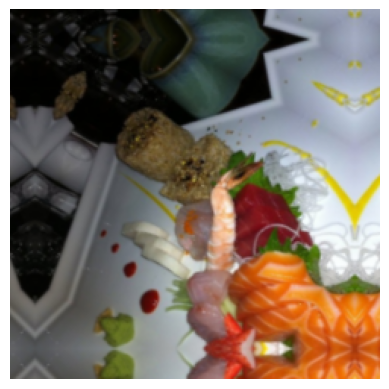

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(train_x[4]).numpy().astype("uint8"))

## CNN from scratch (with data augmentation)

In [ ]:
scratch_model = Sequential([
  data_augmentation,
  Rescaling(1./255, input_shape=(train_x.shape[1], train_x.shape[2], 3)),

  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dropout(0.3),
  Dense(11, activation='softmax'),

])


scratch_model.compile(optimizer='adam', loss=loss(),  metrics=['accuracy'], run_eagerly=True)


scratch_history = scratch_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
71/71 [==============================] - 19s 246ms/step - loss: 2.2878 - accuracy: 0.1618 - val_loss: 2.2289 - val_accuracy: 0.1847
Epoch 2/100
71/71 [==============================] - 17s 234ms/step - loss: 2.2092 - accuracy: 0.1902 - val_loss: 2.1717 - val_accuracy: 0.2313
Epoch 3/100
71/71 [==============================] - 18s 254ms/step - loss: 2.1454 - accuracy: 0.2298 - val_loss: 2.0776 - val_accuracy: 0.2740
Epoch 4/100
71/71 [==============================] - 17s 235ms/step - loss: 2.0836 - accuracy: 0.2687 - val_loss: 2.0329 - val_accuracy: 0.2807
Epoch 5/100
71/71 [==============================] - 16s 230ms/step - loss: 2.0159 - accuracy: 0.2904 - val_loss: 1.9610 - val_accuracy: 0.3100
Epoch 6/100
71/71 [==============================] - 16s 229ms/step - loss: 1.9650 - accuracy: 0.3087 - val_loss: 1.9734 - val_accuracy: 0.3107
Epoch 7/100
71/71 [==============================] - 16s 232ms/step - loss: 1.9262 - accuracy: 0.3289 - val_loss: 1.8990 - val_accuracy:

In [ ]:
y_pred = scratch_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements2['scratched_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.30      0.45      0.36       101
           1       0.33      0.27      0.30        48
           2       0.49      0.33      0.40       159
           3       0.47      0.48      0.47        97
           4       0.68      0.41      0.51        95
           5       0.58      0.78      0.66       132
           6       0.54      0.69      0.61        39
           7       0.45      0.37      0.41        27
           8       0.58      0.64      0.61        86
           9       0.81      0.69      0.75       150
          10       0.78      0.82      0.80        66

    accuracy                           0.55      1000
   macro avg       0.55      0.54      0.53      1000
weighted avg       0.57      0.55      0.55      1000


Evaluation accuracy: 0.55

Evaluation precision: 0.5465849783639606

Evaluation recall: 0.5398913406911807

Evaluation f1Score: 0.53

## InceptionV3 (with data augmentation)

In [ ]:
from keras.applications import InceptionV3

In [ ]:
IV3_model = Sequential()

pretrained_model= InceptionV3(include_top=False, input_shape=(244, 244, 3))

for layer in pretrained_model.layers:
        layer.trainable=False

IV3_model.add(pretrained_model)

IV3_model.add(data_augmentation)

IV3_model.add(Conv2D(64, (3,3), activation='relu'))
IV3_model.add(Conv2D(64, (3,3), activation='relu'))
IV3_model.add(BatchNormalization())

IV3_model.add(Flatten())

IV3_model.add(Dense(512, activation='relu'))
IV3_model.add(Dropout(0.5))
IV3_model.add(Dense(11, activation='softmax'))


IV3_model.compile(optimizer='adam', loss=loss(), metrics=['accuracy'], run_eagerly=True)


IV3_history = IV3_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
71/71 [==============================] - 27s 355ms/step - loss: 2.2948 - accuracy: 0.2111 - val_loss: 2.8332 - val_accuracy: 0.1867
Epoch 2/100
71/71 [==============================] - 25s 352ms/step - loss: 2.0643 - accuracy: 0.2827 - val_loss: 2.1084 - val_accuracy: 0.2867
Epoch 3/100
71/71 [==============================] - 24s 337ms/step - loss: 1.9726 - accuracy: 0.3076 - val_loss: 2.2019 - val_accuracy: 0.2873
Epoch 4/100
71/71 [==============================] - 26s 367ms/step - loss: 1.9445 - accuracy: 0.3202 - val_loss: 2.7894 - val_accuracy: 0.1833
Epoch 5/100
71/71 [==============================] - 25s 349ms/step - loss: 1.8959 - accuracy: 0.3338 - val_loss: 2.1484 - val_accuracy: 0.2887
Epoch 6/100
71/71 [==============================] - 25s 357ms/step - loss: 1.8529 - accuracy: 0.3438 - val_loss: 2.9273 - val_accuracy: 0.2160
Epoch 7/100
71/71 [==============================] - 25s 347ms/step - loss: 1.8240 - accuracy: 0.3500 - val_loss: 2.4568 - val_accuracy:

In [ ]:
y_pred = IV3_model.predict(evalu_x, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements2['IV3_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

              precision    recall  f1-score   support

           0       0.22      0.19      0.20       101
           1       0.36      0.33      0.34        48
           2       0.26      0.23      0.24       159
           3       0.22      0.30      0.25        97
           4       0.46      0.12      0.18        95
           5       0.43      0.55      0.49       132
           6       0.70      0.18      0.29        39
           7       0.33      0.04      0.07        27
           8       0.18      0.51      0.27        86
           9       0.61      0.51      0.56       150
          10       0.48      0.20      0.28        66

    accuracy                           0.33      1000
   macro avg       0.39      0.29      0.29      1000
weighted avg       0.38      0.33      0.32      1000


Evaluation accuracy: 0.326

Evaluation precision: 0.3866613804228305

Evaluation recall: 0.28673738565796336

Evaluation f1Score: 0.28835213472637006


## EfficientNetV2 (with data augmentation)

In [ ]:
from keras.applications import EfficientNetB0

In [ ]:
eNet_model = Sequential()

pretrained_model= EfficientNetB0(include_top=False, input_shape=(244, 244, 3))

for layer in pretrained_model.layers:
        layer.trainable=False

eNet_model.add(data_augmentation)
eNet_model.add(pretrained_model)
eNet_model.add(Flatten())
eNet_model.add(Dense(512, activation='relu'))
eNet_model.add(Dropout(0.5))
eNet_model.add(Dense(11, activation='softmax'))

In [ ]:
eNet64_model = eNet_model
eNet64_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet64_history = eNet64_model.fit(train_x, train_y, batch_size=64, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
71/71 [==============================] - 25s 224ms/step - loss: 2.7138 - accuracy: 0.4958 - val_loss: 1.3002 - val_accuracy: 0.7067
Epoch 2/100
71/71 [==============================] - 14s 193ms/step - loss: 1.3264 - accuracy: 0.6133 - val_loss: 1.0995 - val_accuracy: 0.7407
Epoch 3/100
71/71 [==============================] - 16s 223ms/step - loss: 1.2029 - accuracy: 0.6393 - val_loss: 1.0222 - val_accuracy: 0.7587
Epoch 4/100
71/71 [==============================] - 14s 191ms/step - loss: 1.1346 - accuracy: 0.6680 - val_loss: 1.0526 - val_accuracy: 0.7680
Epoch 5/100
71/71 [==============================] - 16s 224ms/step - loss: 1.0570 - accuracy: 0.6833 - val_loss: 0.9036 - val_accuracy: 0.7813
Epoch 6/100
71/71 [==============================] - 16s 222ms/step - loss: 1.0267 - accuracy: 0.6882 - val_loss: 0.9153 - val_accuracy: 0.7873
Epoch 7/100
71/71 [==============================] - 14s 192ms/step - loss: 0.9404 - accuracy: 0.7078 - val_loss: 1.0023 - val_accuracy:

In [ ]:
y_pred = eNet64_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements2['eNet64_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 5s 66ms/step
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       101
           1       0.96      0.52      0.68        48
           2       0.81      0.89      0.84       159
           3       0.88      0.71      0.79        97
           4       0.87      0.81      0.84        95
           5       0.85      0.96      0.90       132
           6       1.00      1.00      1.00        39
           7       0.86      0.93      0.89        27
           8       0.95      0.85      0.90        86
           9       0.95      0.98      0.97       150
          10       0.93      0.97      0.95        66

    accuracy                           0.87      1000
   macro avg       0.89      0.86      0.87      1000
weighted avg       0.88      0.87      0.87      1000


Evaluation accuracy: 0.873

Evaluation precision: 0.8917649410397991

Evaluation recall: 0.8606871612454405

Evaluation f1Score: 0.8

In [ ]:
eNet128_model = eNet_model
eNet128_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet128_history = eNet128_model.fit(train_x, train_y, batch_size=128, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
36/36 [==============================] - 24s 480ms/step - loss: 0.4971 - accuracy: 0.8642 - val_loss: 1.0879 - val_accuracy: 0.8393
Epoch 2/100
36/36 [==============================] - 15s 426ms/step - loss: 0.4653 - accuracy: 0.8687 - val_loss: 1.1409 - val_accuracy: 0.8393
Epoch 3/100
36/36 [==============================] - 13s 362ms/step - loss: 0.4621 - accuracy: 0.8729 - val_loss: 1.1674 - val_accuracy: 0.8353
Epoch 4/100
36/36 [==============================] - 13s 362ms/step - loss: 0.4899 - accuracy: 0.8691 - val_loss: 1.0820 - val_accuracy: 0.8487
Epoch 5/100
36/36 [==============================] - 15s 424ms/step - loss: 0.5414 - accuracy: 0.8580 - val_loss: 1.1825 - val_accuracy: 0.8393
Epoch 6/100
36/36 [==============================] - 13s 358ms/step - loss: 0.5520 - accuracy: 0.8578 - val_loss: 1.2026 - val_accuracy: 0.8460
Epoch 7/100
36/36 [==============================] - 13s 360ms/step - loss: 0.4906 - accuracy: 0.8633 - val_loss: 1.2065 - val_accuracy:

In [ ]:
y_pred = eNet128_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements2['eNet128_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 3s 65ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       101
           1       0.93      0.54      0.68        48
           2       0.76      0.86      0.80       159
           3       0.88      0.75      0.81        97
           4       0.86      0.76      0.80        95
           5       0.82      0.98      0.90       132
           6       0.97      1.00      0.99        39
           7       0.92      0.81      0.86        27
           8       0.97      0.81      0.89        86
           9       0.95      0.98      0.96       150
          10       0.89      0.97      0.93        66

    accuracy                           0.86      1000
   macro avg       0.89      0.84      0.86      1000
weighted avg       0.87      0.86      0.86      1000


Evaluation accuracy: 0.862

Evaluation precision: 0.8857104110285886

Evaluation recall: 0.8447800519087519

Evaluation f1Score: 0.8

In [ ]:
eNet256_model = eNet_model
eNet256_model.compile(optimizer='adam',loss=loss(),metrics=['accuracy'])

eNet256_history = eNet256_model.fit(train_x, train_y, batch_size=256, epochs=100, callbacks=[EScallback1, EScallback2], validation_data =(valid_x,  valid_y))

Epoch 1/100
18/18 [==============================] - 24s 968ms/step - loss: 0.4837 - accuracy: 0.8704 - val_loss: 1.2756 - val_accuracy: 0.8367
Epoch 2/100
18/18 [==============================] - 13s 723ms/step - loss: 0.4441 - accuracy: 0.8773 - val_loss: 1.2958 - val_accuracy: 0.8373
Epoch 3/100
18/18 [==============================] - 15s 854ms/step - loss: 0.4555 - accuracy: 0.8740 - val_loss: 1.2909 - val_accuracy: 0.8347
Epoch 4/100
18/18 [==============================] - 15s 845ms/step - loss: 0.4565 - accuracy: 0.8784 - val_loss: 1.2293 - val_accuracy: 0.8407
Epoch 5/100
18/18 [==============================] - 13s 713ms/step - loss: 0.3752 - accuracy: 0.8929 - val_loss: 1.2450 - val_accuracy: 0.8393
Epoch 6/100
18/18 [==============================] - 15s 846ms/step - loss: 0.3858 - accuracy: 0.8831 - val_loss: 1.2083 - val_accuracy: 0.8467
Epoch 7/100
18/18 [==============================] - 15s 848ms/step - loss: 0.3952 - accuracy: 0.8882 - val_loss: 1.2540 - val_accuracy:

In [ ]:
y_pred = eNet256_model.predict(evalu_x)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(evalu_y, y_pred_bool)
precision = precision_score(evalu_y, y_pred_bool, average="macro")
recall = recall_score(evalu_y, y_pred_bool, average="macro")
f1Score = f1_score(evalu_y, y_pred_bool, average="macro")

measurements2['eNet256_model'] = [accuracy, precision, recall, f1Score]

print(classification_report(evalu_y, y_pred_bool))
print('\nEvaluation accuracy:', accuracy)
print('\nEvaluation precision:', precision)
print('\nEvaluation recall:', recall)
print('\nEvaluation f1Score:', f1Score)

32/32 [==============================] - 3s 67ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       101
           1       0.92      0.50      0.65        48
           2       0.78      0.91      0.84       159
           3       0.85      0.75      0.80        97
           4       0.87      0.80      0.84        95
           5       0.87      0.98      0.92       132
           6       1.00      1.00      1.00        39
           7       0.92      0.89      0.91        27
           8       0.99      0.79      0.88        86
           9       0.97      0.98      0.98       150
          10       0.90      0.97      0.93        66

    accuracy                           0.88      1000
   macro avg       0.90      0.86      0.87      1000
weighted avg       0.88      0.88      0.88      1000


Evaluation accuracy: 0.879

Evaluation precision: 0.8993184934034839

Evaluation recall: 0.8601974885736638

Evaluation f1Score: 0.8

## Results

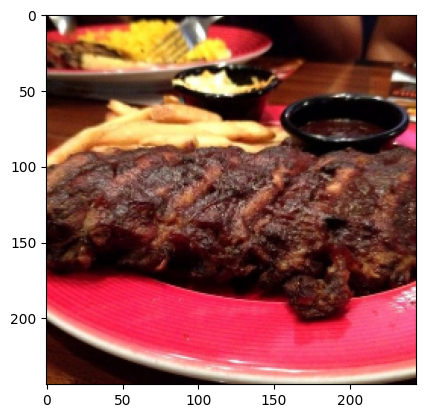

1/1 [==============================] - 0s 60ms/step
Our model says it is Meat
1/1 [==============================] - 0s 243ms/step
IV3 model says it is Meat
1/1 [==============================] - 0s 38ms/step
eNet64 model says it is Meat
1/1 [==============================] - 0s 51ms/step
eNet128 model says it is Meat
1/1 [==============================] - 0s 54ms/step
eNet256 model says it is Meat


In [ ]:
sample = valid_x[30]

plt.imshow(sample)
plt.show()

predS = scratch_model.predict(sample.reshape(-1, 244, 244, 3))
predS = np.argmax(predS)
print("Our model says it is", classes[predS])

predIV3 = IV3_model.predict(sample.reshape(-1, 244, 244, 3))
predIV3 = np.argmax(predIV3)
print("IV3 model says it is", classes[predIV3])

predENet64 = eNet64_model.predict(sample.reshape(-1, 244, 244, 3))
predENet64 = np.argmax(predENet64)
print("eNet64 model says it is", classes[predENet64])

predENet128 = eNet128_model.predict(sample.reshape(-1, 244, 244, 3))
predENet128 = np.argmax(predENet128)
print("eNet128 model says it is", classes[predENet128])

predENet256 = eNet256_model.predict(sample.reshape(-1, 244, 244, 3))
predENet256 = np.argmax(predENet256)
print("eNet256 model says it is", classes[predENet256])

In [ ]:
measure_table_DA = pd.DataFrame.from_dict(measurements2).T
measure_table_DA.rename(columns = {0:'Accuracy', 1:'Precision', 2:'Recall', 3:'F1-Score'}, inplace = True)

# saving the table
pickle_out = open("measurements2.pickle", "wb")
pickle.dump(measure_table_DA, pickle_out)
pickle_out.close()

measure_table_DA

,Accuracy,Precision,Recall,F1-Score
scratched_model,0.550,0.546585,0.539891,0.533942
IV3_model,0.326,0.386661,0.286737,0.288352
eNet64_model,0.873,0.891765,0.860687,0.868140
eNet128_model,0.862,0.885710,0.844780,0.857827
eNet256_model,0.879,0.899318,0.860197,0.871597
